In [1]:
!pip install kaggle
import os

# Move the uploaded API key to the correct directory
os.makedirs("/root/.kaggle", exist_ok=True)
os.rename("kaggle.json", "/root/.kaggle/kaggle.json")

# Set file permissions for the API key
os.chmod("/root/.kaggle/kaggle.json", 600)

In [2]:
!kaggle datasets download -d miracle9to9/files1

Dataset URL: https://www.kaggle.com/datasets/miracle9to9/files1
License(s): ODC Attribution License (ODC-By)
 97% 508M/525M [00:05<00:00, 147MB/s]
100% 525M/525M [00:05<00:00, 102MB/s]


In [3]:
!unzip files1.zip

Streaming output truncated to the last 5000 lines.
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell

In [4]:
# importing libraries
import numpy as np
import pandas as pd
import random
import os
import cv2
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.efficientnet import EfficientNetB3
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D, GlobalAveragePooling2D, Dense, Input

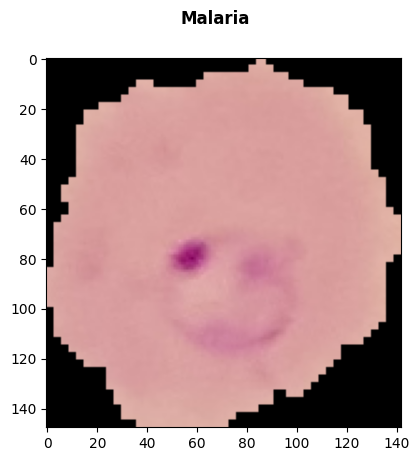

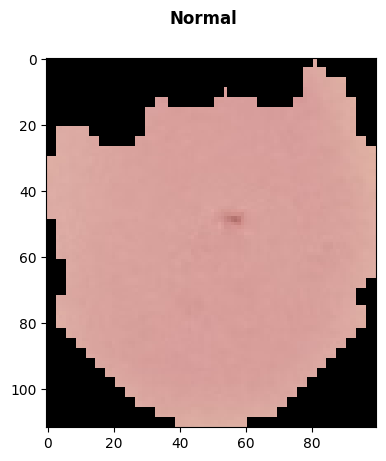

In [5]:
from IPython.display import Image
image_path = '/content/Malaria Cells/testing_set/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'
normal_image_path = '/content/Malaria Cells/testing_set/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_21.png'


sample = imread(image_path)
plt.imshow(sample)
plt.suptitle('Malaria', fontsize=12, weight='bold')
plt.show()


sample = imread(normal_image_path)
plt.imshow(sample)
plt.suptitle('Normal', fontsize=12, weight='bold')
plt.show()

In [6]:
# Data shape
print("Shape of image is -",cv2.imread(image_path).shape)
print("Shape of image is -",cv2.imread(normal_image_path).shape)


Shape of image is - (148, 142, 3)
Shape of image is - (112, 100, 3)


In [7]:

def data_preprocessing(output_size):
  train_datagen = ImageDataGenerator(rescale = 1./255,
                                    zoom_range = 0.2,
                                    shear_range = 0.2,
                                    rotation_range=15,
                                    fill_mode='nearest',
                                    validation_split=0.2,
                                    horizontal_flip = True)

  test_datagen = ImageDataGenerator(rescale = 1./255)

  training_set = train_datagen.flow_from_directory('/content/Malaria Cells/training_set',
                                                  target_size = (output_size, output_size),
                                                  batch_size = 32,
                                                  seed=42,
                                                  class_mode = 'binary',
                                                  shuffle=True)

  test_set = test_datagen.flow_from_directory('/content/Malaria Cells/testing_set',
                                              target_size = (output_size, output_size),
                                              batch_size = 32,
                                              class_mode = 'binary',
                                              seed=42,
                                              shuffle = False)



  return training_set, test_set

In [9]:
num_of_classes = 2
training_set, test_set = data_preprocessing(128)

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

history = model.fit_generator(training_set,
                              epochs=10,
                              validation_data=test_set)

Found 27558 images belonging to 2 classes.
Found 15832 images belonging to 2 classes.


<ipython-input-9-fada0504e83c>:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_set,


Epoch 1/10
862/862 [==============================] - 172s 197ms/step - loss: 0.4609 - acc: 0.8107 - val_loss: 0.2303 - val_acc: 0.9262
Epoch 2/10
862/862 [==============================] - 173s 200ms/step - loss: 0.2506 - acc: 0.9275 - val_loss: 0.2008 - val_acc: 0.9346
Epoch 3/10
862/862 [==============================] - 174s 202ms/step - loss: 0.2301 - acc: 0.9296 - val_loss: 0.2674 - val_acc: 0.9233
Epoch 4/10
862/862 [==============================] - 172s 200ms/step - loss: 0.2237 - acc: 0.9327 - val_loss: 0.1914 - val_acc: 0.9394
Epoch 5/10
862/862 [==============================] - 171s 198ms/step - loss: 0.2142 - acc: 0.9354 - val_loss: 0.1979 - val_acc: 0.9246
Epoch 6/10
862/862 [==============================] - 171s 198ms/step - loss: 0.2163 - acc: 0.9355 - val_loss: 0.1837 - val_acc: 0.9352
Epoch 7/10
862/862 [==============================] - 171s 198ms/step - loss: 0.2077 - acc: 0.9366 - val_loss: 0.2016 - val_acc: 0.9409
Epoch 8/10
862/862 [============================

In [10]:
model.save("Malaria_94_acc.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


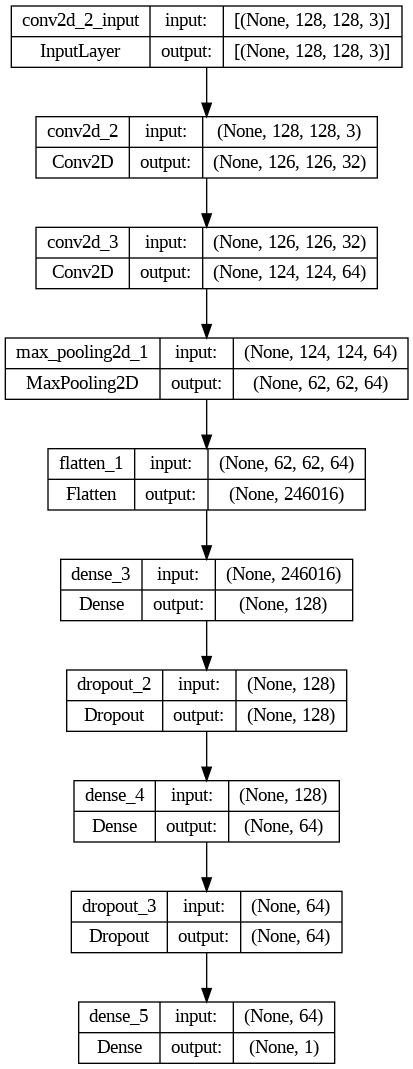

In [11]:
from keras.utils import plot_model
input_size = 224
plot_model(model, to_file='ensemble_model.png', show_shapes=True, show_layer_names=True)

In [12]:
print("Training Accuracy -", round(history.history['acc'][-1]*100,2),"%")
print("Validation Accuracy -", round(history.history['val_acc'][-1]*100,2),"%")

Training Accuracy - 94.03 %
Validation Accuracy - 94.37 %


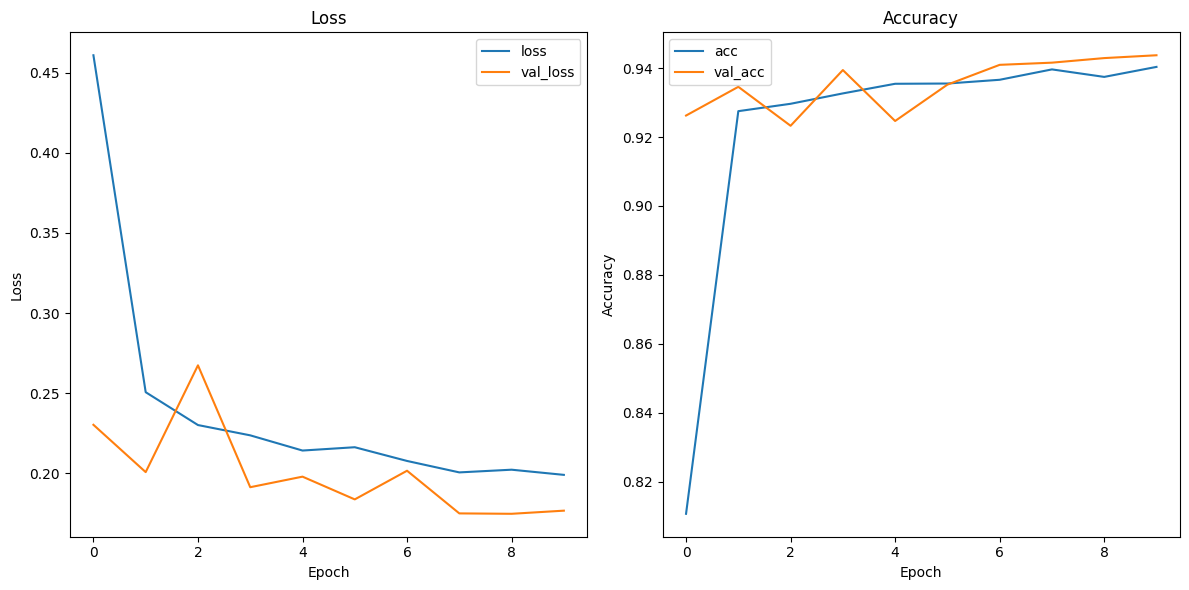

In [13]:
import matplotlib.pyplot as plt

def plotting(history):
    plot_data = pd.DataFrame(history.history)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Plotting Loss
    plot_data[['loss', 'val_loss']].plot(ax=axes[0], title='Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')

    # Plotting Accuracy
    plot_data[['acc', 'val_acc']].plot(ax=axes[1], title='Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

plotting(history)

In [41]:
from tensorflow.keras.preprocessing import image

def prediction(img_path):
  img = image.load_img(img_path, target_size=(128, 128))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0  # Normalize the pixel values

  # Make the prediction
  prediction = model.predict(img_array)

  print(prediction[0][0])

  # Convert the prediction to a class label
  predicted_class = print("Malaria")if prediction[0, 0] <= 0.5 else print('Normal')

  # predicted_class
  print(prediction[0]*100)
  benign_sample = imread(img_path)
  plt.imshow(benign_sample)

1/1 [==============================] - 0s 18ms/step
0.0021490138
Malaria
[0.21490139]
1/1 [==============================] - 0s 18ms/step
0.023538226
Malaria
[2.3538227]
1/1 [==============================] - 0s 16ms/step
0.12637015
Malaria
[12.637014]


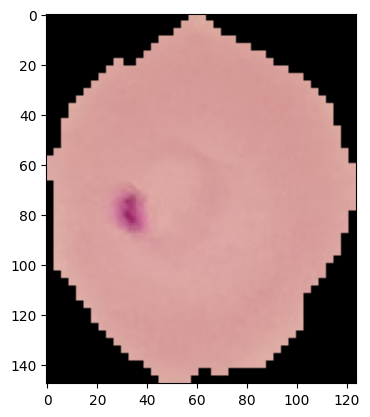

In [42]:
prediction('/content/Malaria Cells/single_prediction/Parasitised.png')
prediction('/content/Malaria Cells/testing_set/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png')
prediction('/content/Malaria Cells/testing_set/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_170.png')

1/1 [==============================] - 0s 17ms/step
0.9452762
Normal
[94.52762]


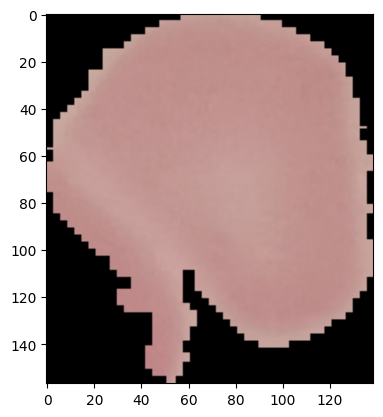

In [43]:
prediction('/content/Malaria Cells/single_prediction/Uninfected.png')

In [47]:
# img_path = '/content/Malaria Cells/testing_set/Uninfected/C100P61ThinF_IMG_20150918_144348_cell_120.png'
img_path= '/content/download.jpeg'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values

# Make the prediction
prediction = model.predict(img_array)

# Convert the prediction to a class label
predicted_class = print("Malaria")if prediction[0, 0] <= 0.5 else print('Normal')

1/1 [==============================] - 0s 18ms/step
Malaria
